In [1]:
%matplotlib inline
import numpy as np
import torch
from mpl_toolkits import mplot3d
from d2l import torch as d2l

In [2]:
def f(x):
    return x * torch.cos(np.pi * x)

def g(x):
    return f(x) + 0.2 * torch.cos(5 * np.pi * x)

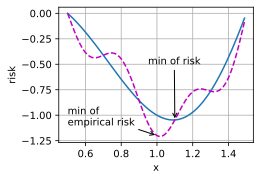

In [3]:
def annotate(text, xy, xytext):
    d2l.plt.gca().annotate(text, xy=xy, xytext=xytext,
                           arrowprops=dict(arrowstyle='->'))
    
x = torch.arange(0.5, 1.5, 0.01)
d2l.set_figsize((4.5, 2.5))
d2l.plot(x, [f(x), g(x)], 'x', 'risk')
annotate('min of\nempirical risk', (1.0, -1.2), (0.5, -1.1))
annotate('min of risk', (1.1, -1.05), (0.95, -0.5))

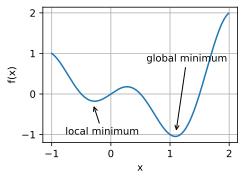

In [4]:
x = torch.arange(-1.0, 2.0, 0.01)
d2l.plot(x, [f(x),], 'x', 'f(x)')
annotate('local minimum', (-0.3, -0.25), (-0.77, -1.0))
annotate('global minimum', (1.1, -0.95), (0.6, 0.8))

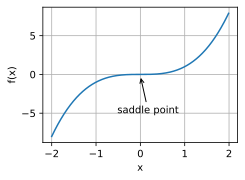

In [5]:
x = torch.arange(-2.0, 2.0, 0.01)
d2l.plot(x, [x**3], 'x', 'f(x)')
annotate('saddle point', (0, -0.2), (-0.52, -5.0))

/Users/peilei/opt/anaconda3/envs/d2l/lib/python3.8/site-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  /Users/distiller/project/conda/conda-bld/pytorch_1639180898435/work/aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


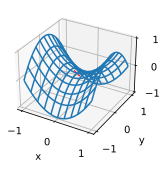

In [6]:
x, y = torch.meshgrid(
    torch.linspace(-1.0, 1.0, 101), torch.linspace(-1.0, 1.0, 101))
z = x**2 - y**2

ax = d2l.plt.figure().add_subplot(111, projection='3d')
ax.plot_wireframe(x, y, z, **{'rstride': 10, 'cstride': 10})
# rstride, cstride 是点与点之间的步长
ax.plot([0], [0], [0], 'rx')
ticks = [-1, 0, 1]
d2l.plt.xticks(ticks) # 设置坐标轴刻度
d2l.plt.yticks(ticks)
ax.set_zticks(ticks)
d2l.plt.xlabel('x')
d2l.plt.ylabel('y');

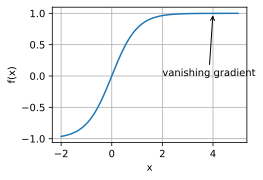

In [7]:
x = torch.arange(-2.0, 5.0, 0.01)
d2l.plot(x, [torch.tanh(x)], 'x', 'f(x)')
annotate('vanishing gradient', (4, 1), (2, 0.0))

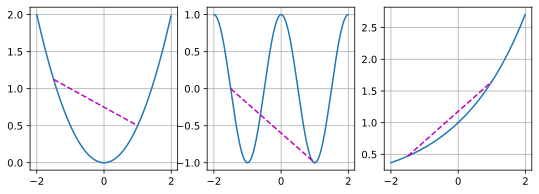

In [8]:
f = lambda x: 0.5 * x ** 2 # 凸函数
g = lambda x: torch.cos(np.pi * x) # 非凸函数
h = lambda x: torch.exp(0.5 * x) # 凸函数

x, segment = torch.arange(-2, 2, 0.01), torch.tensor([-1.5, 1])
d2l.use_svg_display()
_, axes = d2l.plt.subplots(1, 3, figsize=(9, 3))
for ax, func in zip(axes, [f, g, h]):
    d2l.plot([x, segment], [func(x), func(segment)], axes=ax)

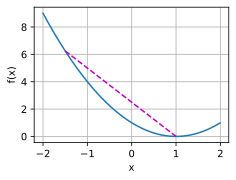

In [9]:
f = lambda x: (x - 1) ** 2
d2l.set_figsize()
d2l.plot([x, segment], [f(x), f(segment)], 'x', 'f(x)')

In [10]:
def f(x):
    return x ** 2

def f_grad(x):
    return 2 * x

In [11]:
def gd(eta, f_grad):
    x = 10.0
    results = [x]
    for i in range(10):
        x -= eta * f_grad(x)
        results.append(float(x))
    print(f'epoch 10, x: {x: f}')
    return results

results = gd(0.2, f_grad)

epoch 10, x:  0.060466


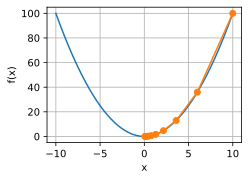

In [12]:
def show_trace(results, f):
    n = max(abs(min(results)), abs(max(results)))
    f_line = torch.arange(-n, n, 0.01)
    d2l.set_figsize()
    d2l.plot([f_line, results], [[f(x) for x in f_line], [
        f(x) for x in results]], 'x', 'f(x)', fmts=['-', '-o'])
    
show_trace(results, f)

epoch 10, x:  3.486784


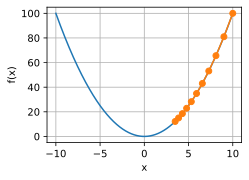

In [13]:
show_trace(gd(0.05, f_grad), f)

epoch 10, x:  61.917364


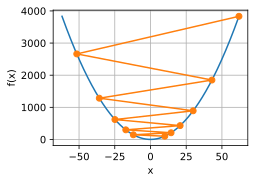

In [14]:
show_trace(gd(1.1, f_grad), f)

epoch 10, x: -1.528165


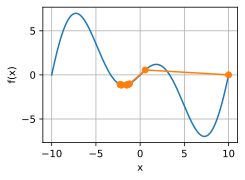

In [15]:
c = torch.tensor(0.15 * np.pi)

def f(x):
    return x * torch.cos(c * x)

def f_grad(x):
    return torch.cos(c * x) - c * x * torch.sin(c * x)

show_trace(gd(2, f_grad), f)

In [18]:
def train_2d(trainer, steps=20, f_grad=None):
    '''用定制的训练机优化 2D 目标函数'''
    # s1 和 s2 是稍后使用的内部状态变量
    x1, x2, s1, s2 = -5, -2, 0, 0
    results = [(x1, x2)]
    for i in range(steps):
        if f_grad:
            x1, x2, s1, s2 = trainer(x1, x2, s1, s2, f_grad)
        else:
            x1, x2, s1, s2 = trainer(x1, x2, s1, s2)
        results.append((x1, x2))
    print(f'epoch {i + 1}, x1: {float(x1): f}, x2: {float(x2): f}')
    return results

def show_trace_2d(f, results):
    '''显示优化过程中 2D 变量的轨迹'''
    d2l.set_figsize()
    d2l.plt.plot(*zip(*results), '-o', color='#ff7f0e')
    x1, x2 = torch.meshgrid(torch.arange(-5.5, 1.0, 0.1),
                            torch.arange(-3.0, 1.0, 0.1))
    d2l.plt.contour(x1, x2, f(x1, x2), colors='#1f77b4')
    d2l.plt.xlabel('x1')
    d2l.plt.ylabel('x2')

epoch 20, x1: -0.057646, x2: -0.000073


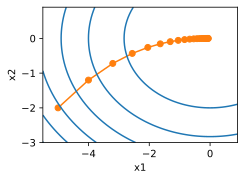

In [19]:
def f_2d(x1, x2):
    return x1 ** 2 + 2 * x2 ** 2

def f_2d_grad(x1, x2):
    return (2 * x1, 4 * x2)

def gd_2d(x1, x2, s1, s2, f_grad):
    g1, g2 = f_grad(x1, x2)
    return (x1 - eta * g1, x2 - eta * g2, 0, 0)

eta = 0.1
show_trace_2d(f_2d, train_2d(gd_2d, f_grad=f_2d_grad))

epoch 10, x:  tensor(0.)


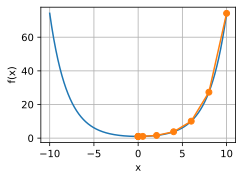

In [23]:
c = torch.tensor(0.5)

def f(x):
    return torch.cosh(c * x)

def f_grad(x):
    return c * torch.sinh(c * x)

# 𝐇=∇^2𝑓(𝐱) 即 f(x) 的二阶导 
def f_hess(x):
    return c ** 2 * torch.cosh(c * x)

def newton(eta=1):
    x = 10.0
    results = [x]
    for i in range(10):
        x -= eta * f_grad(x) / f_hess(x) 
        # f_grad(x) / f_hess(x) 就是 𝐇^(−1)∇𝑓(𝐱)
        results.append(float(x))
    print('epoch 10, x: ', x)
    return results

show_trace(newton(), f)

epoch 10, x:  tensor(26.8341)


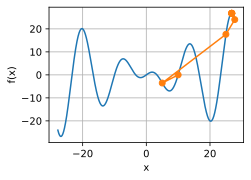

In [28]:
c = torch.tensor(0.15 * np.pi)

def f(x):
    return x * torch.cos(c * x)

def f_grad(x):
    return torch.cos(c * x) - c * x * torch.sin(c * x)

def f_hess(x):
    return -2 * c * torch.sin(c * x) - x * c ** 2 * torch.cos(c * x)

show_trace(newton(), f)

epoch 10, x:  tensor(7.2699)


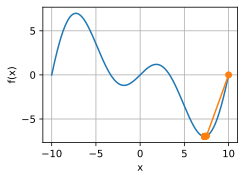

In [25]:
show_trace(newton(0.5), f)

epoch 50, x1: -0.202992, x2: -0.048056


/Users/peilei/opt/anaconda3/envs/d2l/lib/python3.8/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


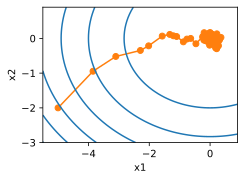

In [30]:
def f(x1, x2):
    return x1 ** 2 + 2 * x2 ** 2

def f_grad(x1, x2):
    return 2 * x1, 4 * x2

def sgd(x1, x2, s1, s2, f_grad):
    g1, g2 = f_grad(x1, x2)
    # 向梯度中加入噪声，以模拟随机梯度下降
    g1 += torch.normal(0.0, 1, (1,))
    g2 += torch.normal(0.0, 1, (1,))
    # 均值为 0，方差为 1 的噪声并不会改变梯度的期望
    eta_t = eta * lr()
    return (x1 - eta_t * g1, x2 - eta_t * g2, 0, 0)

def constant_lr():
    return 1

eta = 0.1
lr = constant_lr
show_trace_2d(f, train_2d(sgd, steps=50, f_grad=f_grad))

epoch 1000, x1: -0.818236, x2: -0.015052


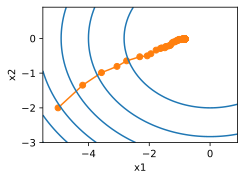

In [32]:
import math

def exponential_lr():
    # 指数衰减
    global t
    t += 1
    return math.exp(-0.1 * t)

t = 1
lr = exponential_lr
show_trace_2d(f, train_2d(sgd, steps=1000, f_grad=f_grad))

epoch 50, x1: -0.075508, x2:  0.005810


/Users/peilei/opt/anaconda3/envs/d2l/lib/python3.8/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


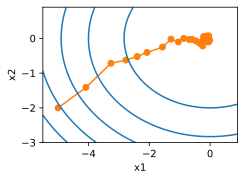

In [33]:
def polynomial_lr():
    # 多项式收敛
    global t
    t += 1
    return (1 + 0.1 * t) ** (-0.5)

t = 1
lr = polynomial_lr
show_trace_2d(f, train_2d(sgd, steps=50, f_grad=f_grad))